<h1 style="text-align:center; margin: 0px;">Rozpoznawanie płci na podstawie głosu</h1>
<h2 style="text-align:center; margin: 0px;">Michał Sut i Karol Mąkosa</h2>
<h3 style="text-align:center; margin: 0px;">Politechnika Warszawska</h3>
<h4 style="text-align:center; margin: 0px;">Wydział Elektryczny</h4>
<h5 style="text-align:center; margin: 0px;">Eksploracja Danych</h5>

# 1. Wprowadzenie
## 1.1 Opis problemu
Tematem naszego projektu jest rozpoznawanie płci człowieka na podstawie analizy jego głosu. Określenie płci ze względu na głos osoby wydaje się początkowo łatwym zadaniem. Często ludzkie ucho może łatwo wykryć różnicę między męskim lub żeńskim głosem w ciągu pierwszych kilku sekund wypowiedzi. Jednakże zaprojektowanie programu komputerowego, który byłby w stanie wykonać to samo, okazuje się zadaniem skomplikowanym. Podczas tego projektu wykonamy analizę, odpowiednie przygotowanie danych oraz ich wykorzystanie w modelach klasyfikacji. Naszym celem jest stworzenie programu, który będzie w stanie określić płeć osoby na podstawie analizy próbki jej głosu z jak największą dokładnością.

## 1.2 Zbiór danych
Analizowany zbiór danych składa się z 3168 nagranych próbek głosów męskich i żeńskich. Próbki zostały wstępnie przetworzone za pomocą analizy akustycznej w języku R przy użyciu narzędzi 'seewave' i 'tuneR'. Zbiór jest ograniczony do próbek, których zakres częstotliwości mieścił się w przedziale 0hz-280hz.

## 1.3 Narzędzia
Projekt wykonany zostanie w języku Python3 z dystrybucji Anaconda3 (wersja 4.3.27) z wykorzystaniem narzędzi do uczenia maszynowego, obsługi zbiorów danych i ich wizualizacji. Wykorzystamy biblioteki: 'sklearn', 'numpy', 'pandas' oraz 'matplotlib'.


# 2. Załadowanie bibliotek oraz wczytanie danych

Nasz program rozpoczynamy od załadowania modułów, z których będziemy korzystać:


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, mixture
import sklearn.preprocessing as sklp
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from pandas.plotting import scatter_matrix
from sklearn import model_selection, metrics
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

%matplotlib inline

Następnie wczytamy dane do pamięci. Aby mieć dostęp do danych na dowolnym komputerze podłączonym do internetu, postanowiliśmy, że będziemy je przechować w serwisie Github, korzystając z usługi [GithubGist](https://gist.github.com/). 
Plik znajduje się pod adresem:

https://gist.githubusercontent.com/de-nuke/37be64cf4d06d63ddeece5ae17664e97/raw/3f853a5e56d1bb229c49c4143fb52a6f883af5f1/voice.csv

In [3]:
dataset = pd.read_csv("https://gist.githubusercontent.com/de-nuke/37be64cf4d06d63ddeece5ae17664e97/raw/3f853a5e56d1bb229c49c4143fb52a6f883af5f1/voice.csv")
pd.set_option('display.max_rows', 20)
dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


Mamy do czynienia z 3168 rekordami oraz 20 atrybutami opisującymi i 1 atrybutem decyzyjnym ('label' - określa płeć). Wszystkie atrybuty opisujące są liczbami zmiennoprzecinkowymi, a atrybut decyzyjny jest ciągiem znaków i przyjmuje wartości 'male' lub 'female'. Atrybut ten dzieli zbiór na 2 równe podzbiory liczące 1584 kobiet i mężczyzn.

- meanfreq -> średnia częstotliwość (w kHz)
- sd -> odchylenie standardowe czestotliwości
- median -> mediana częstotliwości (w kHz)
- Q25 -> pierwszy kwantyl (w kHz) 
-Q75 -> trzeci kwantyl (w kHz)
- IQR -> rozstęp międzykwartylowy (w kHz)
- skew -> skośność rozkładu
- kurt -> kurtoza
- sp.ent -> entropia widmowa (ang. spectral entropy)
- sfm -> płaskość widmowa
- mode -> dominanta częstotliwości
- centroid -> centroida częstotliwości
- meanfun -> średnia podstawowa częstotliwość
- minfun -> minimalna podstawowa częstotliwość
- maxfun -> maksymalna podstawowa częstotliwość
- meandom -> średnia częstotliwość dominująca
- mindom -> minimalna częstotliwość dominująca
- maxdom -> maksymalna częstotliwość dominująca
- dfrange -> zakres częstotliwości dominującej
- modindx -> wskaźnik modulacji. Obliczony jako suma wartości bezwzględnych różnic między sąsiednimi pomiarami podstawowych częstotliwości podzielona przez zakres częstotliwości

# 3. Analiza danych
Wstępna analiza danych pomaga w zrozumieniu danych i zauważeniu szczegółów, które pomogą w późniejszych etapach eksploracji danych.

## 3.1 Brakujące dane
Aby poprawnie wykonać analizę, należy sprawdzić, czy występują jakieś brakujące dane.

In [5]:
# Set empty cells (if any) to NaN
dataset.replace('', np.nan, inplace=True)

# Check if dataset is missing any data (False -> no missing data)
dataset.isnull().values.any()

False

W przypadku tych danych nie występują żadne braki.

## 3.2 Statystyki danych

In [6]:
print("Liczebność obiektów, liczebność klas:")
print(dataset.shape) #Liczebność obiektów i atrybutów
def pretty_print(label, mini, maxi, mean, std, scope, nlabel=20, nnum=20, heading=False):
    f = "{:<%ds}{:<%ds}{:<%ds}{:<%ds}{:<%ds}" % (nnum, nnum, nnum, nnum, nnum) if heading else "{:<%d.3f}{:<%d.3f}{:<%d.3f}{:<%d.3f}{:<%d.3f}" % (nnum, nnum, nnum, nnum, nnum)
    print(str(label) + " "*(nlabel - len(label)) + f.format(mini, maxi, mean, std, scope))
    
all_description = dataset.describe() # Zliczenie danych, wyciągnięcie średnich, standardowych odchyleń, minimum, kwartyli oraz maksimum
grouped = dataset.groupby('label') # Grupowanie po płci
print("\nLiczebność obiektów kobieta i mężczyzna:")
print(grouped.size())
female_description = grouped.get_group('female').describe()
male_description = grouped.get_group('male').describe()
print("\nSTATYSTYKI:")
i = 0
for description in tuple([all_description, female_description, male_description]):
    if i == 0:
        print("\nWyszyscy:")
    elif i == 1:
        print("\nKobiety:")
    else:
        print("\nMężczyźni:")
    i+=1
    pretty_print("Atrybut", "minimum", "maksimum", "średnia", "odchylenie", "max-min", heading=True)
    for key in description.keys():
        mini = description[key]['min']
        maxi = description[key]['max']
        mean = description[key]['mean']
        std = description[key]['std']
        scope = maxi - mini
        pretty_print(key, mini, maxi, mean, std, scope)

Liczebność obiektów, liczebność klas:
(3168, 21)

Liczebność obiektów kobieta i mężczyzna:
label
female    1584
male      1584
dtype: int64

STATYSTYKI:

Wyszyscy:
Atrybut             minimum             maksimum            średnia             odchylenie          max-min             
meanfreq            0.039               0.251               0.181               0.030               0.212               
sd                  0.018               0.115               0.057               0.017               0.097               
median              0.011               0.261               0.186               0.036               0.250               
Q25                 0.000               0.247               0.140               0.049               0.247               
Q75                 0.043               0.273               0.225               0.024               0.231               
IQR                 0.015               0.252               0.084               0.043               0.238     

Jak widać, zbiór danych posiada **3168 obiektów**, które posiadają **20 atrybutów opisujących**, które są reprezentowane przez wartość liczbową oraz **1 atrybut decyzyjny** - płeć, który dzieli zbiór na 2 równe podzbiory liczące 1584 kobiet i mężczyzn. Atrybuty opisujące to statystyki głosów użytych w nagraniach.

Stworzono również tabele dla każdego atrybutu pokazujące jego minimum, maksimum, średnią wartość oraz odchylenie standardowe dla całego zbioru danych, samych kobiet oraz samych mężczyzn. Możemy tu zaobserwować zależności między danymi, które później posłużą do klasyfikacji. Np., że średnia częstotliwość głosu kobiet jest większa niż średnia częstotliwość głosu mężczyzn. Taka sama sytuacja zachodzi ze średnią częstotliwością dominującą.

Atrybutem o najmniejszej zmienności, zgodnie z miarami odchylenia standardowego i rozstępu jest **Odchylenie standardowe częstotliwości (sd)**. Oznacza to, że ten atrybut będzie miał niewielki wpływ na klasyfikator.

Atrybutem o największej zmienności, zgodnie z miarami odchylenia standardowego i rozstępu jest **Kurtoza częstotliwości (kurt)**. Ten atrybut miałby duży wpływ na klasyfikatory.

## 3.3 Korelacja

Korelacja między 2 atrybutami pokazuje, jak bardzo są one współzależne. Przybiera ona wartości od −1 (zupełna korelacja ujemna), przez 0 (brak korelacji) do +1 (zupełna korelacja dodatnia). Aby ułatwić odczytywanie współczynnika skorelowania, wartości bliskie 0 są <span style="color:green">zielone</span>, a bliskie 1 lub -1 są <span style="color:red">czerwone</span>. Ponadto, przedstawimy dwa przykładowe wykresy: atrybutów mocno oraz słabo skorelowanych.

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.51557,-0.216979
sd,-0.739039,1,-0.562603,-0.846931,-0.161076,0.87466,0.314597,0.346241,0.71662,0.838086,-0.52915,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.12266
median,0.925445,-0.562603,1,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.66169,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1,0.47714,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.47714,1,0.00963577,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.0237501,0.335114,0.335648,-0.216475
IQR,-0.627605,0.87466,-0.477352,-0.874189,0.00963577,1,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.22268,-0.0695883,-0.333362,-0.357037,-0.337877,-0.331563,0.0412524
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1,0.97702,-0.195459,0.0796941,-0.434859,-0.322327,-0.167668,-0.216954,-0.0808611,-0.336848,-0.0616077,-0.305651,-0.30464,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.97702,1,-0.127644,0.109884,-0.406722,-0.316036,-0.19456,-0.203201,-0.0456672,-0.303234,-0.103313,-0.2745,-0.272729,-0.205539
sp.ent,-0.601203,0.71662,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.66169,-0.766875,-0.378198,0.663601,0.0796941,0.109884,0.866411,1,-0.485913,-0.784332,-0.421066,-0.3621,-0.192369,-0.428442,-0.289593,-0.436649,-0.43158,0.211477


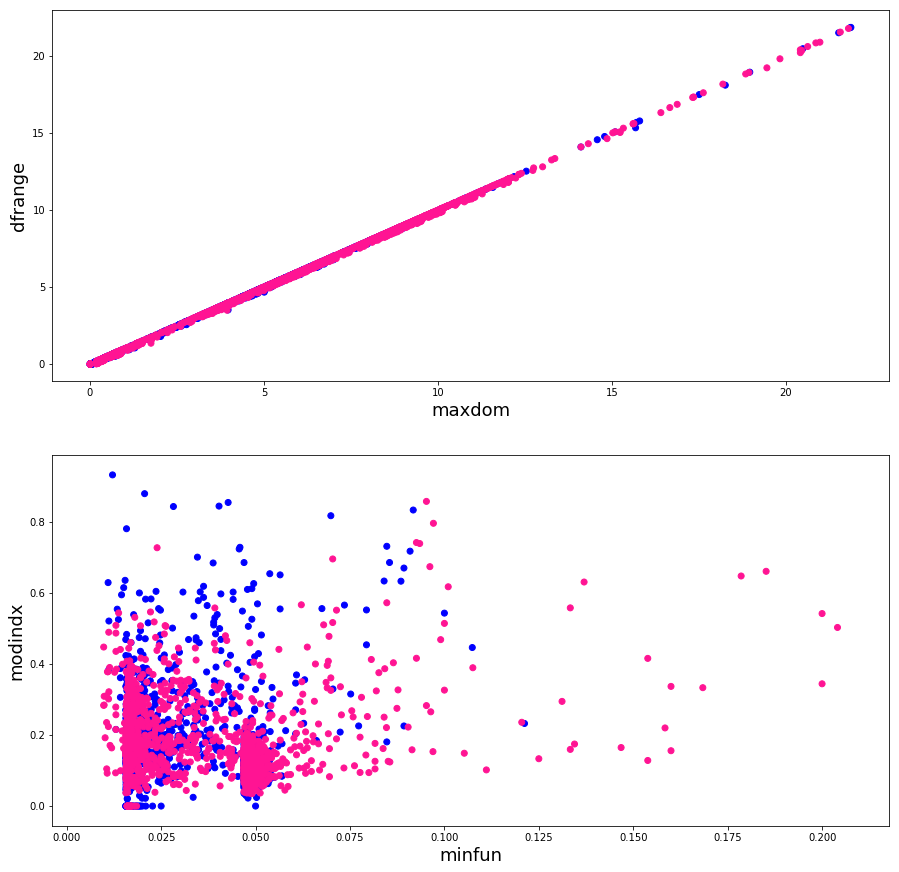

In [17]:
def color_me(val):
    color = 'red' if abs(val) > 0.85 else ('green' if abs(val) < 0.15 else 'black')
    return 'color: %s' % color
display(dataset.corr().style.applymap(color_me))

correlation = dataset.corr()
minimum = (float("inf"), 'column', 'index')
maximum = (-float("inf"), 'column', 'index')
for colname in list(correlation):
    minvalue = abs(correlation[colname]).min()
    maxvalue = abs(correlation[colname][correlation[colname] != 1]).max()
    index_min = abs(correlation[colname]).index[correlation[colname] == minvalue]
    index_max = abs(correlation[colname]).index[correlation[colname] == maxvalue]
    if minvalue < minimum[0]:
        minimum = (minvalue, colname, index_min[0] if not index_min.empty else index_min)
    if maxvalue > maximum[0]:
        maximum = (maxvalue, colname, index_max[0] if not index_max.empty else index_max)

map_gender_to_color = {'male':'#0000ff', 'female': '#ff1493'}
f, axarr = plt.subplots(2,figsize=(15,15))
axarr[0].scatter(dataset[maximum[1]], dataset[maximum[2]],color=[map_gender_to_color[label] for label in dataset.label])
axarr[0].set_xlabel(maximum[1], fontsize=18)
axarr[0].set_ylabel(maximum[2], fontsize=18)
axarr[1].scatter(dataset[minimum[1]], dataset[minimum[2]], color=[map_gender_to_color[label] for label in dataset.label])
axarr[1].set_xlabel(minimum[1], fontsize=18)
axarr[1].set_ylabel(minimum[2], fontsize=18)
plt.show()

### 3.2 Ocena wizualna
Zastosowanie oceny wizualnej oraz subiektywnej oceny człowieka jest przydatne podczas eksploracji danych. Miary danych nie zawsze pokazują wszystko, co chcielibyśmy o nich wiedzieć. Aby dowiedzieć się, które z atrybutów mają największy wpływ na atrybut decyzyjny, porównamy ich histogramy:

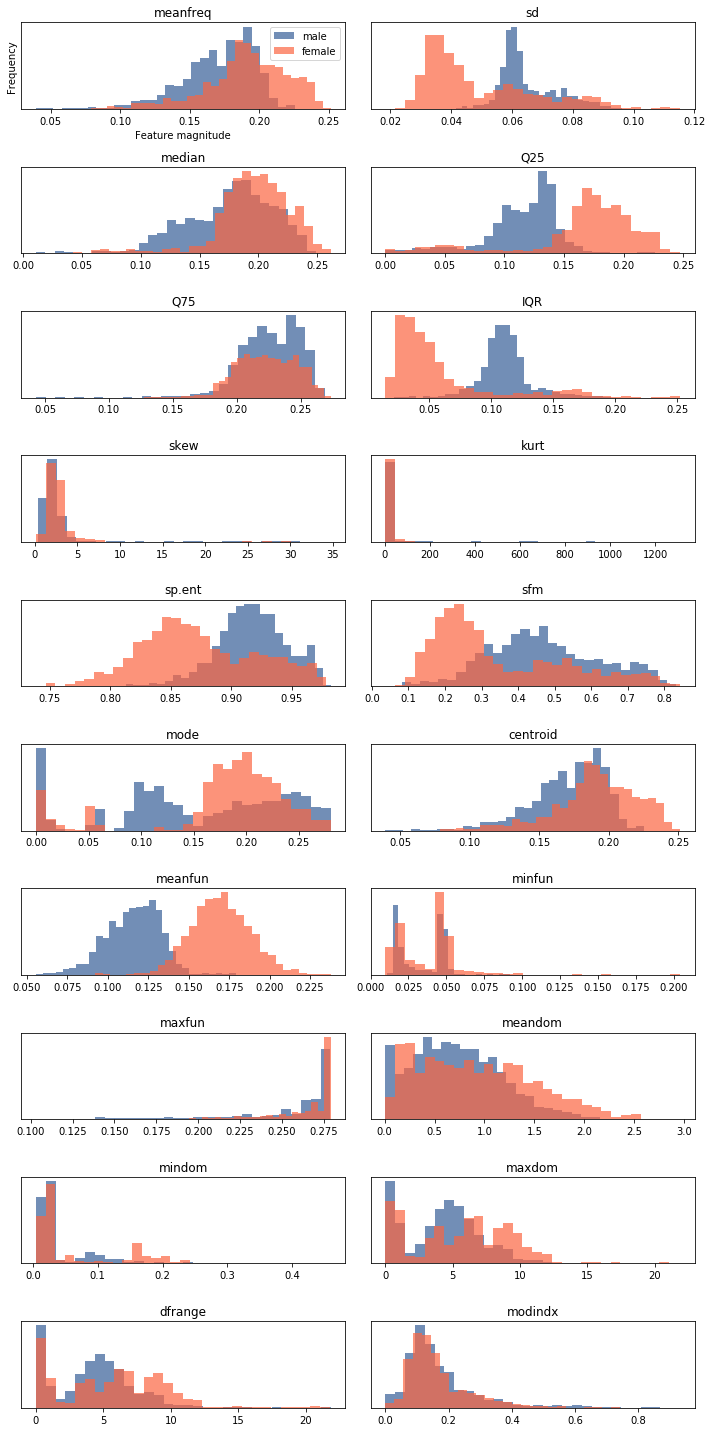

In [8]:
from matplotlib.colors import ListedColormap
cm = ListedColormap(['#375E97', '#FB6542', '#FFBB00'])

male = dataset.loc[dataset['label']=='male']
female = dataset.loc[dataset['label']=='female']

fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()

for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=30, alpha=0.7, color=cm(0))
    ax[i].hist(female.iloc[:,i], bins=30, alpha=0.7, color=cm(1))
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["male", "female"], loc="best")
fig.tight_layout()
plt.show()

Analizując powyższe histogramy, można zauważyć, że niektóre z wartości niektórych atrybutów zdecydowanie różnią ze względu na odpowiadający im atrybut decyzyjny. Cechami, które najbardziej pomogą nam w rozróżnieniu płci głosu są:
* **Q25** (Pierwszy kwartyl)
* **sd** (Odchylenie standardowe)
* **IQR** (Rozstęp międzykwartylowy)
* **sp.ent** (ang. 'Spectral Entropy')
* **sfm** (ang. 'Spectral flatness')
* **mode** (Dominanta)
* **meanfun** (Średnia podstawowa częstotliwość)
Sprawdzimy również jak są skorelowane powyższe atrybuty:

In [9]:
ds = dataset[["Q25", "sd", "IQR", "sp.ent", "sfm", "mode", "meanfun"]]
def color_me(val):
    color = 'red' if abs(val) > 0.65 else ('green' if abs(val) < 0.35 else 'black')
    return 'color: %s' % color
display(ds.corr().style.applymap(color_me))

,Q25,sd,IQR,sp.ent,sfm,mode,meanfun
Q25,1,-0.846931,-0.874189,-0.648126,-0.766875,0.591277,0.545035
sd,-0.846931,1,0.87466,0.71662,0.838086,-0.52915,-0.466281
IQR,-0.874189,0.87466,1,0.640813,0.663601,-0.403764,-0.534462
sp.ent,-0.648126,0.71662,0.640813,1,0.866411,-0.325298,-0.513194
sfm,-0.766875,0.838086,0.663601,0.866411,1,-0.485913,-0.421066
mode,0.591277,-0.52915,-0.403764,-0.325298,-0.485913,1,0.324771
meanfun,0.545035,-0.466281,-0.534462,-0.513194,-0.421066,0.324771,1


## 3.4 Grupowanie
### Porównanie podziału rzeczywistego z grupowaniem przy pomocy modeli

Dane w analizowanym zbiorze posiadają atrybut decyzyjny, który dzieli obiekty na dwie grupy. W związku z tym nie ma potrzeby samodzielnego grupowania. Możemy natomiast sprawdzić jak z grupowaniem takiego zbioru poradziłyby sobie popularne metody grupowania. Sprawdzimy 'KMeans', 'SpectralClustering' i 'GaussianMixture'. Dla przejrzystości wybierzemy tylko kilka atrybutów. W celu zrealizowania grupowania tymczasowo, pozbędziemy się atrybutu decyzyjnego. Doświadczenie ma na celu sprawdzenie, czy grupowanie odda rzeczywisty podział na klasy - płcie.


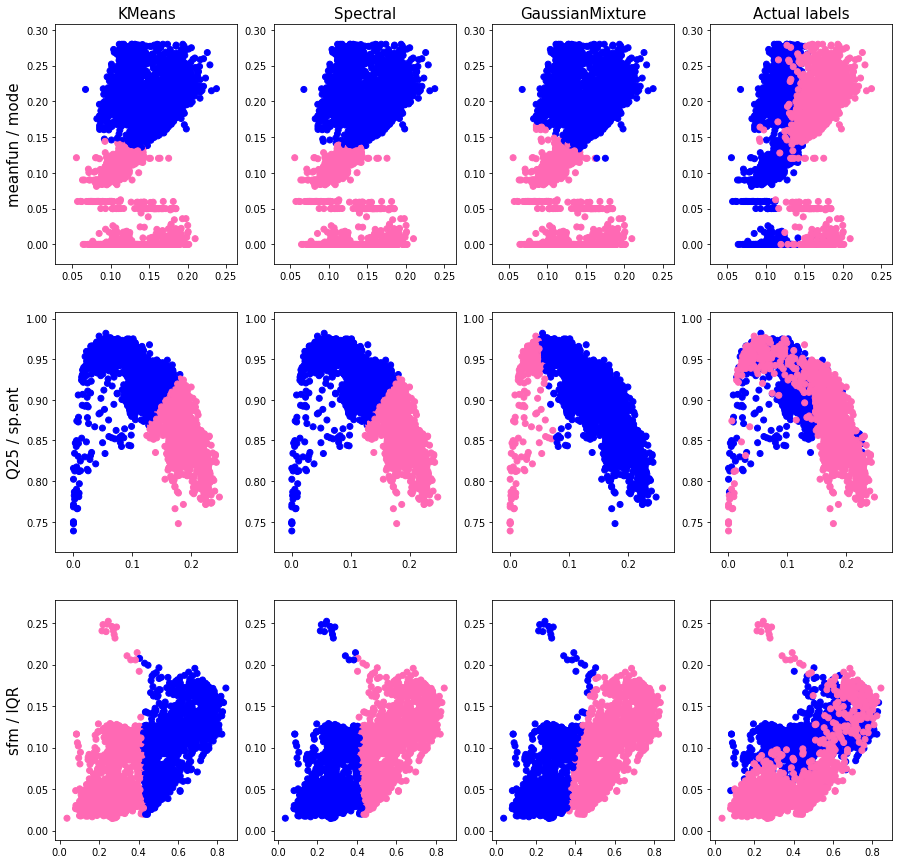

In [10]:
# Variables and objects declarations
N = 2
random_state = 14
kmeans = cluster.KMeans(n_clusters=N, random_state=random_state)
spectral = cluster.SpectralClustering(n_clusters=N, random_state=random_state)
gaussian = mixture.GaussianMixture(n_components=N, random_state=random_state)
mapa = {0:'#0000ff', 1: 'hotpink', 2:'green', 3:'red', 4:'gray', 'male':'#0000ff', 'female': 'hotpink'}
FEATURES = [['meanfun', 'mode'], ['Q25', 'sp.ent'], ['sfm', 'IQR']]
etykiety_kmeans = {}
etykiety_spectral = {}
etykiety_gaussian = {}

# Clustering
for attrs in FEATURES:
    kmeans.fit(dataset[attrs])
    etykiety_kmeans[tuple(attrs)] = kmeans.fit_predict(dataset[attrs])

    spectral.fit(dataset[attrs])
    etykiety_spectral[tuple(attrs)] = spectral.fit_predict(dataset[attrs])

    gaussian.fit(dataset[attrs])
    etykiety_gaussian[tuple(attrs)] = gaussian.predict(dataset[attrs])
    
# Plotting    
fig, axes = plt.subplots(3, 4, figsize=(15,15))
for i, attrs in enumerate(FEATURES):
    axes[i, 0].scatter(dataset[attrs[0]], dataset[attrs[1]], c=[mapa[e] for e in etykiety_kmeans[tuple(attrs)]])
    axes[i, 1].scatter(dataset[attrs[0]], dataset[attrs[1]], c=[mapa[e] for e in etykiety_spectral[tuple(attrs)]])
    axes[i, 2].scatter(dataset[attrs[0]], dataset[attrs[1]], c=[mapa[e] for e in etykiety_gaussian[tuple(attrs)]])
    axes[i, 3].scatter(dataset[attrs[0]], dataset[attrs[1]], c=[mapa[label] for label in dataset.label])
    
axes[0, 0].set_ylabel(FEATURES[0][0] + ' / ' + FEATURES[0][1] , fontsize=15)
axes[1, 0].set_ylabel(FEATURES[1][0] + ' / ' + FEATURES[1][1], fontsize=15)
axes[2, 0].set_ylabel(FEATURES[2][0] + ' / ' + FEATURES[2][1], fontsize=15)
axes[0, 0].set_title('KMeans', fontsize=15)
axes[0, 1].set_title('Spectral', fontsize=15)
axes[0, 2].set_title('GaussianMixture', fontsize=15)
axes[0, 3].set_title('Actual labels', fontsize=15)
plt.show()

Z powyższych wykresów widać, że różne metody grupowania dają podobne rezultaty. Dzieje się tak, ponieważ podział następuje tylko na 2 grupy. Łatwo również zauważyć, że są one całkowicie inne niż rzeczywisty podział na klasy. W analizowanym zbiorze wiele atrybutów pokrywa się, dane nie są skupione wokół dwóch, odległych w przestrzeni punktów. Można zatem stwierdzić, że dany zbiór byłby trudny do pogrupowania, a z powodu mniej poprawnego grupowania, również klasyfikacja dawałaby niższe wyniki.

## 4. Przygotowanie danych do klasyfikacji

1. <p style="margin-bottom: 5px">Aby dobrze przygotować dane do analizy, trzeba imputować brakujące dane oraz usunąć rzadko wypełnione kolumny. W przypadku naszego zbioru danych żaden z tych problemów nie występuje. Dzieje się tak, ponieważ owe dane są wynikiem działania programu komputerowego analizującego ludzki głos na podstawie nagrań. **Poziom wypełnienia kolumn wynosi 100% **.</p>

2. <p style="margin-bottom: 5px">Wartości niektórych kolumn były równe 0. Są to: moda częstotliwości (mode), zakres mody częstotliwości (dfrange) oraz indeks modulacji (modindx). Nie oznacza to nieuzupełnionych danych, a wyliczoną komputerowo wartość na podstawie nagrania. W dalszych analizach **będziemy traktować te wartości jako normalne**.</p>

3. <p style="margin-bottom: 5px">Aby uniknąć niepotrzebnych obliczeń **pozbędziemy się duplikatów**.</p>

4. <p style="margin-bottom: 5px">Biorąc pod uwagę analizę zbioru dokonaną w punkcie *3.2 Ocena wizualna* postanowiliśmy pozostawić w naszym zbiorze tylko te atrybuty, które mają istotny wpływ na atrybut decyzyjny. Tak jak ustaliliśmy we wspomnianym punkcie, będą to: **'Q25, IQR, sp.ent, sfm, mode, meanfun'**.</p>

5. <p style="margin-bottom: 5px">Z nowego zbioru (z pozostawionymi wyżej wymienionymi atrybutami) odrzucimy obiekty, w których przynajmniej jeden atrybut jest oddalony o **2σ**.</p>

6. <p style="margin-bottom: 5px">Aby pomóc algorytmowi w działaniu, dokonamy ** standaryzacji danych ** tak, by atrybut uzyskał średnią wartość oczekiwaną zero i odchylenie standardowe jeden.</p>

## 4.1 Usunięcie duplikatów

In [6]:
uniq = dataset.drop_duplicates()
print('Liczba unikatowych danych:',len(uniq))
print('Liczba wszystkich danych:', len(dataset))

duplicated = [idx for idx, value in enumerate(dataset.duplicated(keep=False)) if value]

print("\nObiekty, które się powtarzają:")
for i in range(len(duplicated)):
    for j in range(i):
        if j != i and (dataset.iloc[duplicated[i]] == dataset.iloc[duplicated[j]]).all():
            print('obiekt nr.',duplicated[j],'z obiektem nr.',duplicated[i])
display(dataset.iloc[duplicated])

dataset = uniq

Liczba unikatowych danych: 3166
Liczba wszystkich danych: 3168

Obiekty, które się powtarzają:
obiekt nr. 232 z obiektem nr. 298
obiekt nr. 2393 z obiektem nr. 2403


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
232,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2393,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


## 4.2 Usunięcie nieistotnych kolumn

In [7]:
features_to_save = ['Q25', 'sd', 'IQR', 'sp.ent', 'sfm', 'mode', 'meanfun', 'label']
dataset = dataset[features_to_save]
dataset

,Q25,sd,IQR,sp.ent,sfm,mode,meanfun,label
0,0.015071,0.064241,0.075122,0.893369,0.491918,0.000000,0.084279,male
1,0.019414,0.067310,0.073252,0.892193,0.513724,0.000000,0.107937,male
2,0.008701,0.083829,0.123207,0.846389,0.478905,0.000000,0.098706,male
3,0.096582,0.072111,0.111374,0.963322,0.727232,0.083878,0.088965,male
4,0.078720,0.079146,0.127325,0.971955,0.783568,0.104261,0.106398,male
5,0.067958,0.079557,0.141634,0.963181,0.738307,0.112555,0.110132,male
6,0.092899,0.074463,0.112819,0.967573,0.762638,0.086197,0.105945,male
7,0.110532,0.076767,0.121430,0.959255,0.719858,0.128324,0.093052,male
8,0.088206,0.078018,0.120381,0.970723,0.770992,0.219103,0.096729,male
9,0.075580,0.080350,0.126377,0.975246,0.804505,0.011699,0.105881,male


## 4.3  Standaryzacja, odrzucenie wartości odstających

In [8]:
# create and train scaler
dataset_train, dataset_test = model_selection.train_test_split(dataset, random_state=0, test_size=.3)
scaler = sklp.StandardScaler().fit(dataset_train.drop('label', axis=1))

# Split and standarize data
X_train = scaler.transform(dataset_train.drop('label', axis=1))
X_test = scaler.transform(dataset_test.drop('label', axis=1))
y_train = dataset_train['label']
y_test = dataset_test['label']

columns = ['Q25', 'sd', 'IQR', 'sp.ent', 'sfm', 'mode', 'meanfun']
X_train_dataframe = pd.DataFrame(X_train, columns=columns)
y_train_dataframe = pd.DataFrame(y_train, columns=['label'])
round(X_train_dataframe.describe(),2)

,Q25,sd,IQR,sp.ent,sfm,mode,meanfun
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.94,-2.32,-1.62,-3.47,-2.09,-2.16,-2.73
25%,-0.59,-0.92,-0.97,-0.75,-0.85,-0.61,-0.79
50%,-0.01,0.13,0.21,0.15,-0.07,0.28,-0.04
75%,0.72,0.60,0.71,0.77,0.73,0.72,0.82
max,2.10,3.35,3.79,1.93,2.39,1.48,2.75


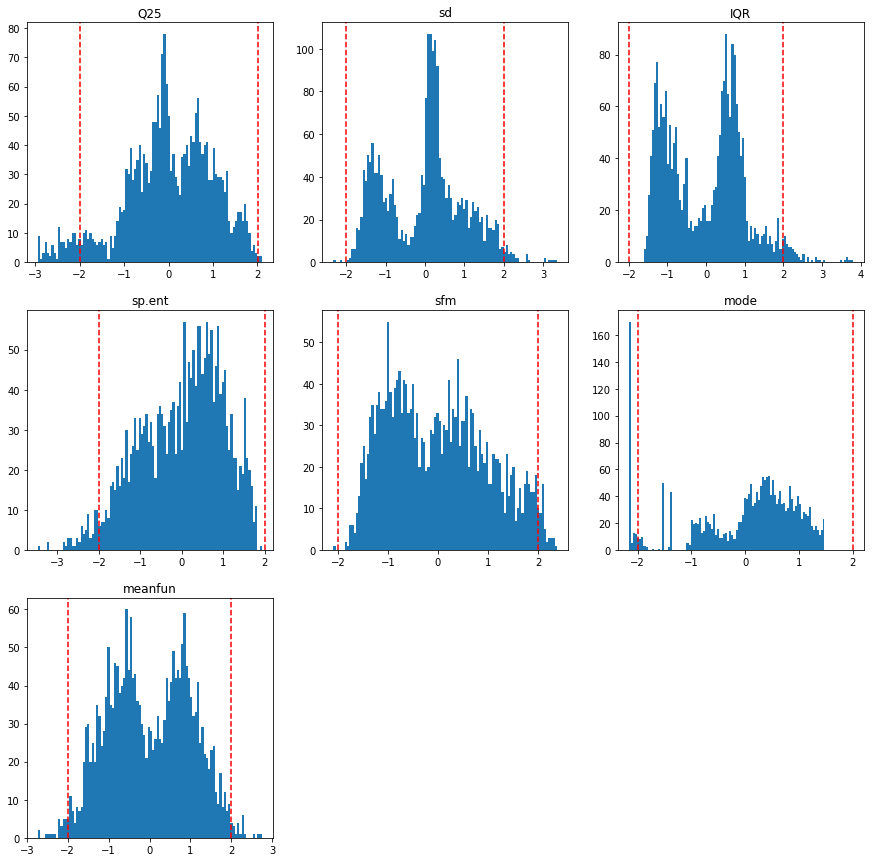

In [9]:
f, axes = plt.subplots(3,3, figsize=(15,15))
# flatten axes
ax = axes.ravel()

# delete unused axes
f.delaxes(axes[2,1])
f.delaxes(axes[2,2])

# plot histograms
columns = ['Q25', 'sd', 'IQR', 'sp.ent', 'sfm', 'mode', 'meanfun']
for i, atribute in enumerate(columns):
    ax[i].set_title(atribute)
    ax[i].hist(X_train_dataframe[atribute], 100)
    
    # red dashed lines indicates 2*std and -2*std
    ax[i].axvline(2*X_train_dataframe[atribute].std(), color='r', linestyle='dashed')
    ax[i].axvline(-2*X_train_dataframe[atribute].std(), color='r', linestyle='dashed')
    
plt.show()

Na wykres czerwoną przerywaną linią zaznaczono proste **x = 2\*sd oraz x=2\*(-sd)**. Obiekty, w których wartość choć jednego atrybutu leży poza obszarem wyznaczonym przez te linie, zostaną usunięte. W ten sposób pozbędziemy się punktów odstających.

Na szczególną uwagę zasługuje **histogram dominanty, czyli atrybutu 'mode'**. W obszarze, który zostanie odrzucony znajduje się stosunkowo dużo wartości. Z wcześniejszej analizy zbioru można się dowiedzieć, że wartości te są równe **0.0**. Biorąc pod uwagę to, że dominanta oznacza wartość najczęściej występującą w zbiorze, można przypuszczać, że próbki w których wynosiła ona zero miały względem innym próbek wiele momentów, w których nikt nic nie mówił, tzn. były wyciszone. Trzymając się zasady o odrzuceniu wartości większych niż **|2\*sd|**, próbki te również zostaną odrzucone.

In [10]:
std_treshold = 2
cleaned_train_dataset = X_train_dataframe[abs(X_train_dataframe) < std_treshold].assign(label=y_train_dataframe.reset_index(drop=True)).dropna()

X_train = cleaned_train_dataset.drop('label', 1).as_matrix()
y_train = cleaned_train_dataset['label'].as_matrix()

## 4.3 Podsumowanie przygotowania
Po przeprowadzeniu powyższych kroków, nasz zbiór treningowy liczy **2104** obiekty, które posiadają **7 atrybutów opisujących**, a dodatkowo, w zbiorze **nie występują duplikaty**.

# 5. Klasyfikacja
## 5.1 Sposób przeprowadzenia klasyfikacji
Głównym celem projektu jest znalezienie dobrego modelu klasyfikacji oraz przetestowania i wykorzystania go do określania płci na podstawie próbek głosu. W tym punkcie poddane analizie zostanie kilka popularnych klasyfikatorów:

    - Logistic Regression (LR)
    - Linear Discriminant Analysis (LDA)
    - K-Nearest Neighbors (KNN)
    - Classification and Regression Trees (CART)
    - Gaussian Naive Bayes (NB)
    - Support Vector Machines (SVM)

## 5.2 Szacowanie dokładności klasyfikatorów


In [11]:
models = []
models.append(('LR_l1', LogisticRegression(penalty='l1')))
models.append(('LR_l2', LogisticRegression(penalty='l2')))
models.append(('LDA_svd', LinearDiscriminantAnalysis(solver='svd')))
models.append(('LDA_lsqr', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('LDA_eigen', LinearDiscriminantAnalysis(solver='eigen')))
models.append(('KNN_3', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN_4', KNeighborsClassifier(n_neighbors=4)))
models.append(('KNN_5', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN_6', KNeighborsClassifier(n_neighbors=6)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_linear', SVC(kernel='linear')))
models.append(('SVM_poly', SVC(kernel='poly')))
models.append(('SVM_rbf', SVC(kernel='rbf')))
models.append(('SVM_sigmoid', SVC(kernel='sigmoid')))

results = []
total_results = []

for name, model in models:
    kf = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)
    total_results.append((name, cv_results.mean()))
print('\nBEST: ', max(total_results, key=lambda x: x[1]))


LR_l1: 0.9711095272036113 (0.014195701380910631)
LR_l2: 0.9700196008553099 (0.014438423545678638)
LDA_svd: 0.9661974340698503 (0.016655494850435226)
LDA_lsqr: 0.9661974340698503 (0.016655494850435226)
LDA_eigen: 0.9672873604181517 (0.015400538117731977)
KNN_3: 0.9787419814682823 (0.008581984849614937)
KNN_4: 0.980924803991447 (0.008146381504819784)
KNN_5: 0.9798289379900215 (0.006899231181892821)
KNN_6: 0.97873901164172 (0.0074722447499325235)
CART: 0.963491922071751 (0.015343464867376212)
NB: 0.9373188405797099 (0.015187073973486433)
SVM_linear: 0.9700136612021858 (0.014047524820085103)
SVM_poly: 0.953667735804229 (0.015440290525073098)
SVM_rbf: 0.9771115466856735 (0.011360873840265328)
SVM_sigmoid: 0.9253088619624613 (0.017044993500570264)

BEST:  ('KNN_4', 0.98092480399144699)


Według powyższych testów klasyfikator **KNN** sprawdzi się najlepiej. Jednakże przetestujemy wszystkie z nich, aby sprawdzić rzeczywistą dokładność i porównać z estymacjami.

## 5.3 Testowanie klasyfikatorów

In [19]:
# models are: LogisticRegression, LinearDiscriminantAnalysis, KNeighborsClassifier, DecisionTreeClassifier, GaussianNB, SVC
best_test = ('',0)
best_train = ('',0)
results = pd.DataFrame(columns=['method', 'test set accuracy', 'train set accuracy'])
for name, model in models:
    model.fit(X_train, y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    score_test = metrics.accuracy_score(y_test, predictions_test)
    score_train = metrics.accuracy_score(y_train, predictions_train)
    best_test = (name, score_test) if score_test > best_test[1] else best_test
    best_train = (name, score_train) if score_train > best_train[1] else best_train
#     print('{:<25} {}'.format(name + ' accuracy:',score))
    results = results.append({'method': name, 'test set accuracy': score_test, 'train set accuracy': score_train}, ignore_index=True)
#     print(metrics.classification_report(y_test, predictions),'\n')
results = results.append({'method': '----', 'test set accuracy': '----', 'train set accuracy': '----'}, ignore_index=True)
results = results.append({'method': 'BEST SCORE', 'test set accuracy': best_test, 'train set accuracy': best_train}, ignore_index=True)
results

,method,test set accuracy,train set accuracy
0,LR_l1,0.957413,0.975749
1,LR_l2,0.954259,0.974798
2,LDA_svd,0.949527,0.969567
3,LDA_lsqr,0.949527,0.969567
4,LDA_sigmoid,0.949527,0.969567
5,KNN_3,0.976341,0.987637
6,KNN_4,0.973186,0.987637
7,KNN_5,0.977918,0.98621
8,KNN_6,0.973186,0.985259
9,CART,0.957413,1


#### Wyniki klasyfikatorów dla nieprzetworzonych danych
Porównamy powyższe wyniki z wynikami klasyfikatorów, uczących się na danych, które nie zostały w żaden sposób przygotowane.

In [12]:
dataset = pd.read_csv("https://gist.githubusercontent.com/de-nuke/37be64cf4d06d63ddeece5ae17664e97/raw/3f853a5e56d1bb229c49c4143fb52a6f883af5f1/voice.csv")

models_2 = []
models_2.append(('LR_l1', LogisticRegression(penalty='l1')))
models_2.append(('LR_l2', LogisticRegression(penalty='l2')))
models_2.append(('LDA_svd', LinearDiscriminantAnalysis(solver='svd')))
models_2.append(('LDA_lsqr', LinearDiscriminantAnalysis(solver='lsqr')))
# models_2.append(('LDA_sigmoid', LinearDiscriminantAnalysis(solver='eigen')))
models_2.append(('KNN_3', KNeighborsClassifier(n_neighbors=3)))
models_2.append(('KNN_4', KNeighborsClassifier(n_neighbors=4)))
models_2.append(('KNN_5', KNeighborsClassifier(n_neighbors=5)))
models_2.append(('KNN_6', KNeighborsClassifier(n_neighbors=6)))
models_2.append(('CART', DecisionTreeClassifier()))
models_2.append(('NB', GaussianNB()))
models_2.append(('SVM_linear', SVC(kernel='linear')))
# models_2.append(('SVM_poly', SVC(kernel='poly')))
models_2.append(('SVM_rbf', SVC(kernel='rbf')))
models_2.append(('SVM_sigmoid', SVC(kernel='sigmoid')))

X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset.drop('label',1), dataset.label, test_size=0.3, random_state=0)

best_test = ('',0)
best_train = ('',0)
results = pd.DataFrame(columns=['method', 'test set accuracy', 'train set accuracy'])
for name, model in models_2:
    model.fit(X_train, y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    score_test = metrics.accuracy_score(y_test, predictions_test)
    score_train = metrics.accuracy_score(y_train, predictions_train)
    best_test = (name, score_test) if score_test > best_test[1] else best_test
    best_train = (name, score_train) if score_train > best_train[1] else best_train
#     print('{:<25} {}'.format(name + ' accuracy:',score))
    results = results.append({'method': name, 'test set accuracy': score_test, 'train set accuracy': score_train}, ignore_index=True)
#     print(metrics.classification_report(y_test, predictions),'\n')
results = results.append({'method': '----', 'test set accuracy': '----', 'train set accuracy': '----'}, ignore_index=True)
results = results.append({'method': 'BEST SCORE', 'test set accuracy': best_test, 'train set accuracy': best_train}, ignore_index=True)
results


C:\Users\Dom\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,method,test set accuracy,train set accuracy
0,LR_l1,0.97266,0.969328
1,LR_l2,0.905363,0.90212
2,LDA_svd,0.97266,0.967975
3,LDA_lsqr,0.97266,0.967975
4,KNN_3,0.727655,0.846189
5,KNN_4,0.723449,0.811457
6,KNN_5,0.719243,0.798376
7,KNN_6,0.713985,0.783942
8,CART,0.956887,1
9,NB,0.892744,0.885882


### Podsumowanie testów
1. Wszystkie klasyfikatory, zgodnie z przewidywaniami, miały większą skuteczność dla zbioru treningowego.
2. Najlepszym klasyfikatorem na zbiorze testowym okazała się klasyfikator K-Najbliższych Sąsiadów (KNearestNeighbours) dla liczby sąsiadów = 5
3. Klasyfikator CART (drzewa decyzyjne) był w 100% skuteczny w przypadku zbioru treningowego


# 6. Podsumowanie i wnioski

## 6.1 Zmienność atrybutów
Dla czystego, nieprzetworzonego zbioru danych atrybutem o najmniejszej zmienności, zgodnie z miarami odchylenia standardowego i rozstępu jest **odchylenie standardowe częstotliwości (sd)**. Oznacza to, że ten atrybut będzie miał niewielki wpływ na klasyfikator. Największą zmiennością wykazał się atrybut **Kurtoza częstotliwości (kurt).**

Sprawdzimy teraz statystyki zbioru przetworzonego i przygotowanego do klasyfikacji:



In [15]:
columns = ['Q25', 'sd', 'IQR', 'sp.ent', 'sfm', 'mode', 'meanfun']
X_test_dataframe = pd.DataFrame(X_test, columns=columns)
y_test_dataframe = pd.DataFrame(y_test, columns=['label'])

test_dataset = X_test_dataframe.assign(label=y_test)
clean_dataset = cleaned_train_dataset.append(test_dataset, ignore_index=True)
clean_dataset.describe()

,Q25,sd,IQR,sp.ent,sfm,mode,meanfun
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,0.165744,-0.095955,-0.067856,0.283247,0.051946,0.217720,0.041037
std,0.619246,0.690146,0.697406,0.837192,0.777567,0.589412,0.741970
min,-1.996979,-1.831206,-1.612731,-1.991173,-1.842359,-1.963714,-1.986680
25%,-0.114624,-0.256840,-0.666303,-0.290535,-0.596678,0.050060,-0.429951
50%,0.137143,0.059458,0.093406,0.676221,0.234432,0.208267,0.130253
75%,0.484160,0.196220,0.414660,0.906087,0.521213,0.511510,0.424271
max,1.929124,1.984506,1.991082,1.771996,1.998167,1.476473,1.995054


W ostatecznym, przygotowanym zbiorze najniższą zmienność miał atrybut **`mode`**, a nawiększą **`sfm`**.

## 6.2 Wpływ korelacji
W zagadnieniu eksploracji danych pożądane jest, aby w zbiorze nie było atrybutów mocno skorelowanych. Gdy jednak takie występują, możemy pokusić się o odrzucenie kilku z nich. Jednocześnie powinniśmy starać się zachować jak najwięcej cech, które mają duży wpływ na atrybut decyzyjny. Powinniśmy starać się zachować balans pomiędzy odrzuceniem atrybutów o dużej korelacji a odrzuceniem atrybutów mających mały wpływ na atrybut decyzyjny, ponieważ zbyt mała liczba cech opisujących może być niewystarczająca do poprawnego nauczenia klasyfikatora.

## 6.3 Analiza grupowania
Przeprowadzone grupowanie pokazało nam, że wiele par atrybutów ma dane pokrywające się ze sobą w przestrzeni, przez co pary te nie byłyby wystarczające do skonstruowania dobrze działającego klasyfikatora. Dlatego też należy używać odpowiednio dużej liczby atrybutów.

## 6.4 Wpływ wstępnego przetworzenia danych
Wykonane testy pokazały, że dane nie przetworzone, dla większości badanych klasyfikatorów, dają gorsze wyniki. Pokazuje to, jak ważne jest, aby przed przystąpieniem do klasyfikacji odpowiednio przeanalizować dane, wyciągnąć wnioski i na tej podstawie przygotować zbiór do klasyfikacji.

## 6.5 Wynik klasyfikacji
Najskuteczniejszym klasyfikatorem okazał się **klasyfikator KNN,** czyli K Najbliższych Sąsiadów z liczbą sąsiadów = 5. Jednocześnie, ten sam klasyfikator okazał się prawie najgorszy dla danych nieprzetworzonych. Można z tego wyciągnąć wniosek, że aby uzyskać jak największą skuteczność dla nowych danych, powinniśmy użyć klasyfikatora KNN, ale również odpowiednio przygotować dane wejściowe.